#              IRISH Dataset 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv'.
##### This is the Vanilla(basic) implementation of all the classification algorithms for simple IRISH Dataset with Data Visualization

In [1]:
from __future__ import print_function
import os
data_path = ['data']
print (data_path)

['data']


## 1. Load Data 

In [2]:
import numpy as np
import pandas as pd

filepath = os.sep.join(data_path + ['Iris_Data.csv'])
print(filepath)
data = pd.read_csv(filepath)
data.head()

data\Iris_Data.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Number of rows
print("Number of rows")
print(data.shape[0])
print("*"*50)
# Column names
print("Column names")
print(data.columns.tolist())
print("*"*50)
# Data types
print("Data types")
print(data.dtypes)


Number of rows
150
**************************************************
Column names
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
**************************************************
Data types
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## 2. Data Preprocessing

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 


In [7]:
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Imputation and sanity check

In [27]:
data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

####        ------------------------------------Hence No Missing value-------------------------------------

## 3. Exploratory Data Analysis

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [12]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [13]:
# applying multiple functions at once - 2 methods
data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## 4. Data Visualization

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

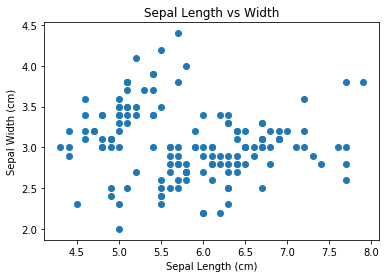

In [16]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

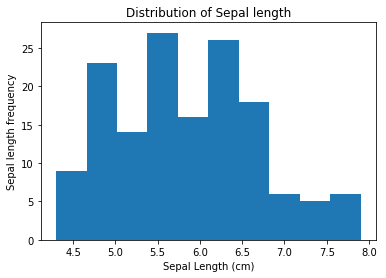

In [18]:
# A simple Histogram plot with Matplotlib
ax = plt.axes()

ax.hist(data.sepal_length)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal length frequency',
       title='Distribution of Sepal length');


Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

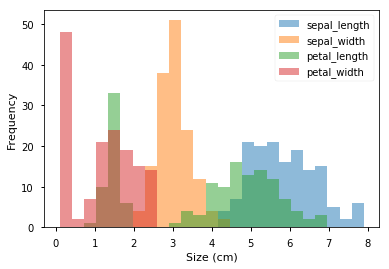

In [19]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

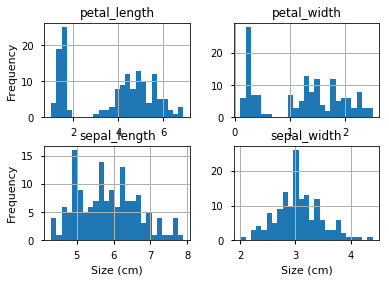

In [20]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

### Boxplot -
Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

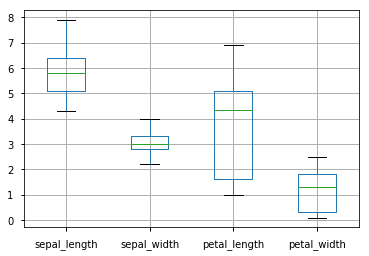

In [21]:
data.boxplot()

In [22]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


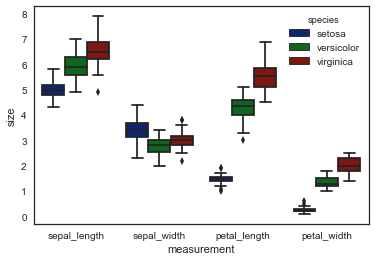

In [23]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

### Correlation Analysis

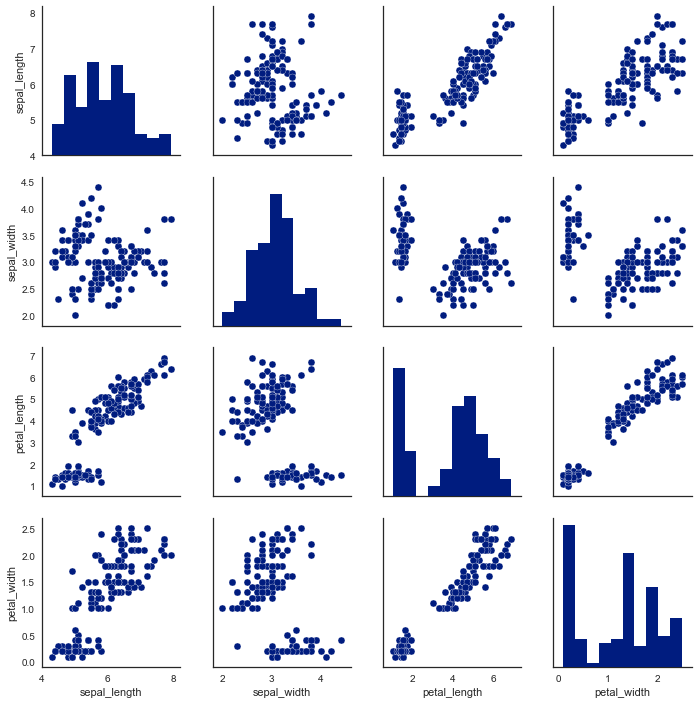

In [24]:
sns.pairplot(data)

## 5. Modeling

In [34]:
from sklearn.model_selection import train_test_split
x = data.drop('species', axis = 1)
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

### Vanilla implementation of Classification Models 

### 1. Logistic Regression

##### parameters-> 

penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’liblinear’, max_iter=100, multi_class=’ovr’, verbose=0, warm_start=False, n_jobs=1)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Train Accuracy")
print(lr.score(x_train,y_train))
print("Test Accuracy")
print(lr.score(x_test,y_test))

Train Accuracy
0.9523809523809523
Test Accuracy
0.8888888888888888


### 2 .KNN Model -> K Nearest Neighbour 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
print("Train Accuracy")
print(kn.score(x_train,y_train))
print("Test Accuracy")
print(kn.score(x_test,y_test))

Train Accuracy
0.9809523809523809
Test Accuracy
0.9555555555555556


### 3. Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(x_train,y_train)
print("Train Accuracy")
print(mn.score(x_train,y_train))
print("Test Accuracy")
print(mn.score(x_test,y_test))

Train Accuracy
0.7238095238095238
Test Accuracy
0.5333333333333333


### 4. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Train Accuracy")
print(dt.score(x_train,y_train))
print("Test Accuracy")
print(dt.score(x_test,y_test))

Train Accuracy
1.0
Test Accuracy
0.9777777777777777


### 5. SVM -> Support Vector Machine

In [45]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
print("Train Accuracy")
print(svm.score(x_train,y_train))
print("Test Accuracy")
print(svm.score(x_test,y_test))

Train Accuracy
0.9714285714285714
Test Accuracy
1.0


### 6. SGD -> Stochastic Gradient descent

In [47]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
print("Train Accuracy")
print(sgd.score(x_train,y_train))
print("Test Accuracy")
print(sgd.score(x_test,y_test))

Train Accuracy
0.7238095238095238
Test Accuracy
0.5333333333333333


C:\Anaconda_5\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


#### Inference -> 
Decision Tree and KNN gave best Accuracy on both Train and Test Dataset